In [29]:
import numpy as np

data = np.loadtxt(fname='./linear_data.csv', delimiter='\t')

data -= data.mean(axis=0)
data /= data.std(axis=0)

x = data[:, :-1]
y = data[:, -1]

x.shape, y.shape

((1503, 5), (1503,))

In [30]:
N, M = x.shape

w = np.ones(M)
b = 0

S_w = np.zeros(M)
S_b = 0

S_w

array([0., 0., 0., 0., 0.])

In [31]:
def predict(x):
    return w.dot(x) + b


predict(x[0])

0.6590042695516543

In [32]:
def get_loss(x, y):
    pred = predict(x)
    loss = (pred - y)**2
    return loss


get_loss(x[0], y[0])

0.21258140154187277

In [33]:
def get_gradient(x, y):
    global w
    global b

    eps = 1e-3

    loss_before = get_loss(x, y)

    gradient_w = np.empty(M)
    for i in range(M):
        w[i] += eps
        loss_after = get_loss(x, y)
        w[i] -= eps
        gradient_w[i] = (loss_after - loss_before) / eps

    b += eps
    loss_after = get_loss(x, y)
    b -= eps
    gradient_b = (loss_after - loss_before) / eps

    return gradient_w, gradient_b


get_gradient(x[0], y[0])

(array([-0.61003339, -1.05581946,  1.66242713,  1.21242212, -0.59417855]),
 0.9231310135582593)

In [34]:
def total_loss():
    loss = 0
    for i in range(N):
        loss += get_loss(x[i], y[i])
    return loss


total_loss()

11073.905141728206

In [35]:
plt_x = []
plt_y = []
for epoch in range(2500):
    i = np.random.randint(N)
    gradient_w, gradient_b = get_gradient(x[i], y[i])

    # 每个变量都有自己的 lr
    S_w = S_w + gradient_w**2
    S_b = S_b + gradient_b**2

    # 计算lr的公式, 1e-6用于防止除0
    lr_w = 1e-1 / ((S_w + 1e-6)**0.5)
    lr_b = 1e-1 / ((S_b + 1e-6)**0.5)

    # 在时刻0, lr就等于梯度的倒数
    # 梯度大的变量会有小lr,梯度小的变量会有大lr
    w -= gradient_w * lr_w
    b -= gradient_b * lr_b

    plt_x.append(epoch)
    plt_y.append(total_loss())

    if epoch % 150 == 0:
        print(epoch, lr_w, lr_b, total_loss())

0 [0.56636095 0.05858363 0.04814669 0.03846768 0.08395236] 0.04739642300958612 10517.514359207338
150 [0.00180141 0.00231144 0.00228052 0.00218072 0.00197149] 0.002380169363262506 2832.167609616658
300 [0.00137824 0.00192293 0.00184673 0.0018268  0.0016123 ] 0.0019423005508928985 1709.9226890514005
450 [0.00126211 0.00168626 0.00165128 0.00164647 0.0014573 ] 0.0017201899432316202 1247.7036232404168
600 [0.00117099 0.00159716 0.0015452  0.00154385 0.0013786 ] 0.0016138157657656076 1022.4983640078017
750 [0.00112968 0.0015189  0.00148884 0.00147634 0.00130672] 0.0015361502510035365 929.5581461076157
900 [0.00108116 0.00146484 0.0014321  0.00143101 0.00127029] 0.0014791521394320654 844.8985992531091
1050 [0.00104165 0.00141214 0.00139475 0.00139689 0.00124408] 0.0014377696108773552 822.8530099338026
1200 [0.00103126 0.00137615 0.00136227 0.00135929 0.00122013] 0.0013988304840800796 820.9382154178479
1350 [0.00100008 0.00132869 0.00132432 0.00132143 0.00118858] 0.001354756547169753 809.354

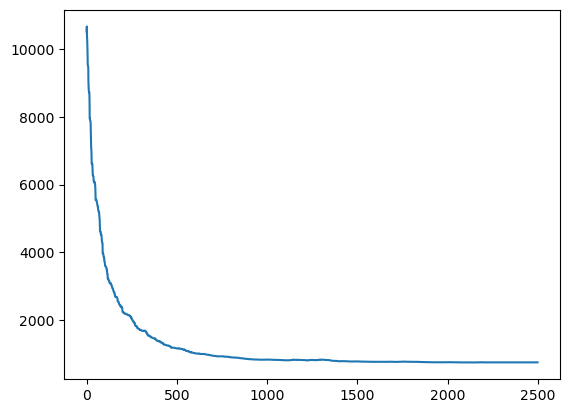

In [36]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(plt_x, plt_y)
plt.show()